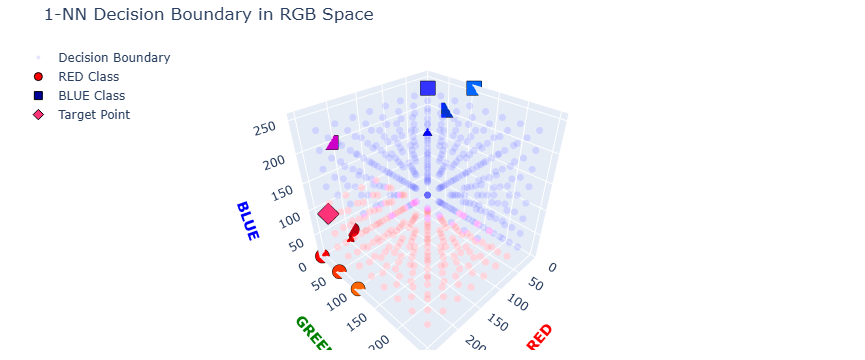

In [12]:
import numpy as np
import plotly.graph_objects as go
from scipy.spatial import KDTree

# Original data
data = [[[255,0,0],"RED"], [[255,51,0],"RED"], [[255,102,0],"RED"], 
        [[204,0,0],"RED"], [[190,0,20],"RED"], [[0,0,153],"BLUE"], 
        [[0,51,204],"BLUE"], [[51,51,255],"BLUE"], [[0,102,255], "BLUE"], 
        [[204,0,198],"BLUE"]]

# Prepare training data
points = np.array([d[0] for d in data])
labels = np.array([1 if d[1] == "RED" else 0 for d in data])  # 1=RED, 0=BLUE

# Create KDTree for 1-NN
tree = KDTree(points)

# Create a grid of points in RGB space
step = 32  # Larger step for performance, reduce for higher resolution
grid_r = np.arange(0, 256, step)
grid_g = np.arange(0, 256, step)
grid_b = np.arange(0, 256, step)
R, G, B = np.meshgrid(grid_r, grid_g, grid_b)
grid_points = np.vstack([R.ravel(), G.ravel(), B.ravel()]).T

# Predict class for each grid point
_, indices = tree.query(grid_points)
pred_labels = labels[indices]

# Create plot
fig = go.Figure()

# Add grid points (decision boundary)
fig.add_trace(go.Scatter3d(
    x=grid_points[:, 0],
    y=grid_points[:, 1],
    z=grid_points[:, 2],
    mode='markers',
    marker=dict(
        size=4,
        color=pred_labels,
        colorscale=[[0, 'rgba(0,0,255,0.1)'], [1, 'rgba(255,0,0,0.1)']],
        line=dict(width=0)
    ),
    name='Decision Boundary'
))

# Add original points
red_points = np.array([d[0] for d in data if d[1] == "RED"])
blue_points = np.array([d[0] for d in data if d[1] == "BLUE"])
target_point =  np.array([[255,51,120]])

# RED points
fig.add_trace(go.Scatter3d(
    x=red_points[:, 0],
    y=red_points[:, 1],
    z=red_points[:, 2],
    mode='markers',
    marker=dict(
        size=8,
        color=['rgb({},{},{})'.format(r,g,b) for r,g,b in red_points],
        line=dict(width=1, color='black')
    ),
    name='RED Class'
))

# BLUE points
fig.add_trace(go.Scatter3d(
    x=blue_points[:, 0],
    y=blue_points[:, 1],
    z=blue_points[:, 2],
    mode='markers',
    marker=dict(
        size=8,
        color=['rgb({},{},{})'.format(r,g,b) for r,g,b in blue_points],
        symbol='square',
        line=dict(width=1, color='black')
    ),
    name='BLUE Class'
))

# Target point
fig.add_trace(go.Scatter3d(
    x=target_point[:,0],
    y=target_point[:,1],
    z=target_point[:,2],
    mode='markers',
    marker=dict(
        size=8,
        color=['rgb({},{},{})'.format(r,g,b) for r,g,b in target_point],
        symbol='diamond',
        line=dict(width=1, color='black')
    ),
    name='Target Point'
))

# Configure layout
fig.update_layout(
    scene=dict(
        xaxis=dict(title='<b>RED</b>', range=[0,260], titlefont=dict(color='red')),
        yaxis=dict(title='<b>GREEN</b>', range=[0,260], titlefont=dict(color='green')),
        zaxis=dict(title='<b>BLUE</b>', range=[0,260], titlefont=dict(color='blue')),
        aspectmode='cube'
    ),
    title='1-NN Decision Boundary in RGB Space',
    margin=dict(r=20, b=10, l=10, t=40),
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01)
)

fig.show()

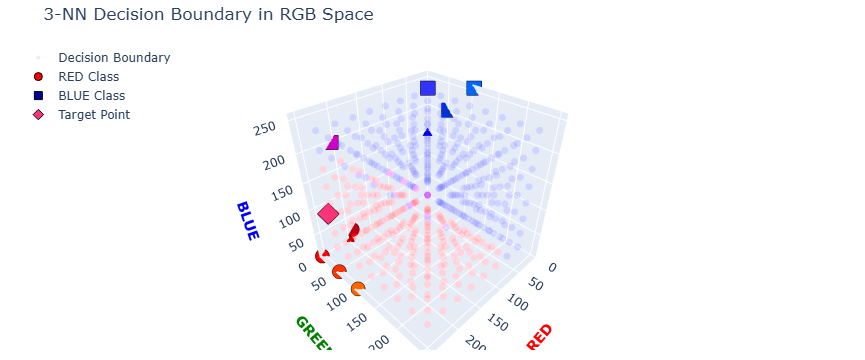

In [15]:

# Create a grid of points in RGB space
step = 32  # Larger step for performance, reduce for higher resolution
grid_r = np.arange(0, 256, step)
grid_g = np.arange(0, 256, step)
grid_b = np.arange(0, 256, step)
R, G, B = np.meshgrid(grid_r, grid_g, grid_b)
grid_points = np.vstack([R.ravel(), G.ravel(), B.ravel()]).T

# Predict class for each grid point using 3NN
_, indices = tree.query(grid_points, k=3)

# Get labels of neighbors
neighbor_labels = labels[indices]

# Majority vote (≥2 votes required)
pred_labels = (np.sum(neighbor_labels, axis=1) >= 2).astype(int)

# Create plot
fig = go.Figure()

# Add grid points (decision boundary)
fig.add_trace(go.Scatter3d(
    x=grid_points[:, 0],
    y=grid_points[:, 1],
    z=grid_points[:, 2],
    mode='markers',
    marker=dict(
        size=4,
        color=pred_labels,
        colorscale=[[0, 'rgba(0,0,255,0.1)'], [1, 'rgba(255,0,0,0.1)']],
        line=dict(width=0)
    ),
    name='Decision Boundary'
))

# Add original points
red_points = np.array([d[0] for d in data if d[1] == "RED"])
blue_points = np.array([d[0] for d in data if d[1] == "BLUE"])
target_point =  np.array([[255,51,120]])

# RED points
fig.add_trace(go.Scatter3d(
    x=red_points[:, 0],
    y=red_points[:, 1],
    z=red_points[:, 2],
    mode='markers',
    marker=dict(
        size=8,
        color=['rgb({},{},{})'.format(r,g,b) for r,g,b in red_points],
        line=dict(width=1, color='black')
    ),
    name='RED Class'
))

# BLUE points
fig.add_trace(go.Scatter3d(
    x=blue_points[:, 0],
    y=blue_points[:, 1],
    z=blue_points[:, 2],
    mode='markers',
    marker=dict(
        size=8,
        color=['rgb({},{},{})'.format(r,g,b) for r,g,b in blue_points],
        symbol='square',
        line=dict(width=1, color='black')
    ),
    name='BLUE Class'
))

# Target point
fig.add_trace(go.Scatter3d(
    x=target_point[:,0],
    y=target_point[:,1],
    z=target_point[:,2],
    mode='markers',
    marker=dict(
        size=8,
        color=['rgb({},{},{})'.format(r,g,b) for r,g,b in target_point],
        symbol='diamond',
        line=dict(width=1, color='black')
    ),
    name='Target Point'
))

# Configure layout
fig.update_layout(
    scene=dict(
        xaxis=dict(title='<b>RED</b>', range=[0,260], titlefont=dict(color='red')),
        yaxis=dict(title='<b>GREEN</b>', range=[0,260], titlefont=dict(color='green')),
        zaxis=dict(title='<b>BLUE</b>', range=[0,260], titlefont=dict(color='blue')),
        aspectmode='cube'
    ),
    title='3-NN Decision Boundary in RGB Space',
    margin=dict(r=20, b=10, l=10, t=40),
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01)
)

fig.show()